# Come up with function to expand zones

In [1]:
triangle1 = [[0,0],[0,1],[1,0]]
triangle2 = [[0,0],[1,1],[1,0]]


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import math

kmeans = KMeans(n_clusters=1)
kmeans = kmeans.fit(triangle2)
centroid = kmeans.cluster_centers_

centroid[0][1]

def polar(x, y):
    """returns r, theta(degrees)
    """
    r = (x ** 2 + y ** 2) ** .5
    if y == 0:
        theta = 180 if x < 0 else 0
    elif x == 0:
        theta = 90 if y > 0 else 270
    else:
        theta = math.degrees(math.atan(float(y) / x)) 
    return r, theta

In [3]:
for x in triangle2:
    print(x,'pair(xy)')
    new_x = centroid[0][0]-x[0]
    new_y = centroid[0][1]-x[1]
    
    print(new_x, new_y, 'new(x,y)')
    
    r, theta = polar(new_x,new_y)
    
    print('r =',r)
    
    if new_y < 0:
        if new_x >0:
            theta += 180
        else:
            theta += 0
    else:
        if new_x < 0:
            theta += 360
        else:
            theta += 180
            
    c = r + 1
    a = c * math.sin(theta)
    b = math.sqrt((c**2)-(a**2))
    
    print('a (new y) = ',a,'\n')
    print('b (new x) = ',b,'\n')
    print('c = ',c,'\n')
    print('theta = ',theta, '\n')
    print('\n')

[0, 0] pair(xy)
0.6666666666666666 0.33333333333333337 new(x,y)
r = 0.7453559924999299
a (new y) =  -1.227552307393523 

b (new x) =  1.240718692197491 

c =  1.7453559924999298 

theta =  206.565051177078 



[1, 1] pair(xy)
-0.33333333333333337 -0.6666666666666666 new(x,y)
r = 0.7453559924999299
a (new y) =  0.989956838383058 

b (new x) =  1.437446694209575 

c =  1.7453559924999298 

theta =  63.43494882292201 



[1, 0] pair(xy)
-0.33333333333333337 0.33333333333333337 new(x,y)
r = 0.47140452079103173
a (new y) =  1.0963924540615568 

b (new x) =  0.9813026294070362 

c =  1.4714045207910318 

theta =  315.0 





# Using Clipper to expand

In [4]:
import pyclipper

subj = ((0,0),(1,0),(1,1))

pco = pyclipper.Pyclipper()
pco.AddPath(subj, )

solution = pco.Execute(5.0)

print(solution)

TypeError: AddPath() takes at least 2 positional arguments (1 given)

# Using Shapely to expand

# Creating the Function

In [ ]:
coords = [[2,2],[1,2],[2,3],[3,3],[2.5,2.5],[3.5,2.5],[1.5,0],[0,0],[2,2]]

def coordinate_get(x):
    return [(i[0], i[1]) for i in x]
a = coordinate_get(coords)

In [5]:
def clockwise(shape):

    shape = np.array(shape)

    sorted_shapeX = sorted(shape, key=lambda k: [k[0]])

    first = sorted_shapeX[0]
    last = sorted_shapeX[-1]
    midx = first[0] + (last[0] - first[0])/2.1100000000000000
    midx += .000000000001
    
    westside = []
    eastside = []

    for x in sorted_shapeX:
        if x[0] <= midx:
            westside.append(x[0:2])
        if x[0] > midx:
            eastside.append(x[0:2])

    sorted_westside = sorted(westside, key=lambda k: [k[1]])
    sorted_eastside = sorted(eastside, key=lambda k: [k[1]], reverse=True)

    clock = sorted_westside + sorted_eastside

    first = clock[0]
    second = clock[1]

    clock.extend([first, second])

    return [(i[0], i[1]) for i in clock]

LINESTRING (0 0, 0 2, 2 2, 1 1, 1 0.75, 2 0, 0 0, 0 2)
POLYGON ((-10 -10, -10 0, -10 2, -10 12, 26.14213562373094 12, 16.08122035641768 1.939084732686737, 32 -10, -10 -10))
[(-10.0, -10.0), (-10.0, 0.0), (-10.0, 2.0), (-10.0, 12.0), (26.142135623730944, 12.0), (16.081220356417685, 1.939084732686737), (32.0, -10.0), (-10.0, -10.0)]


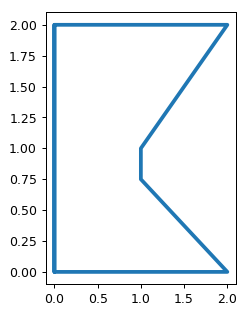

In [25]:
from matplotlib import pyplot
from shapely.geometry import LineString, LinearRing, Polygon, mapping
from descartes import PolygonPatch

def plot_coords(ax, x, y, color='#999999', zorder=1):
    ax.plot(x, y, 'o', color=color, zorder=zorder)

def plot_line(ax, ob,):
    parts = hasattr(ob, 'geoms') and ob or [ob]
    for part in parts:
        x, y = part.xy
        ax.plot(x, y, linewidth=3, solid_capstyle='round', zorder=1)

def set_limits(ax, x_range, y_range):
    ax.set_xlim(*x_range)
    ax.set_ylim(*y_range)
    ax.set_aspect(1)

    
coords = ([(1,1),(2,2),(1,0.75),(0,0),(0,2),(2,0)])
coords = clockwise(coords)
fig = pyplot.figure(1, dpi=90)
ax = fig.add_subplot(122)
obj = LineString(coords)

plot_line(ax, obj)

offset = obj.parallel_offset(10.0, 'left', join_style=2, mitre_limit=10.0)
t = Polygon(offset)
print(obj)
print(t)

expand = list(t.exterior.coords)

{'type': 'LineString',
 'coordinates': ((-2.5, -2.5),
  (-2.5, -2.0),
  (-2.5, 3.0),
  (-2.5, 3.309016994374948),
  (0.09872652454106637, 4.608380256645481),
  (1.0, 3.707106781186548),
  (1.901273475458934, 4.608380256645482),
  (4.5, 3.309016994374949),
  (4.5, -2.5),
  (-2.5, -2.5))}

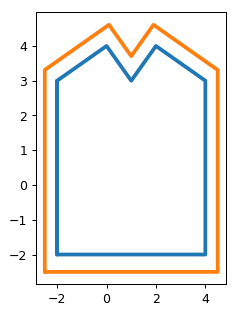

In [4]:
fig = pyplot.figure(1, dpi=90)
ax = fig.add_subplot(122)
obj = LineString([(-2,3),(-2,-2),(4,-2),(4,3),(2,4),(1,3),(0,4),(-2,3),(-2,-2)])

plot_line(ax, obj)

offset = obj.parallel_offset(0.5, 'right', join_style=2, mitre_limit=10.0)
plot_line(ax, offset)

mapping(offset)

LINESTRING (2 2, 1 2, 2 3, 3 3, 2.5 2.5, 3.5 2.5, 1.5 0, 0 0, 2 2)
LINESTRING (-1.207106781186547 -0.5, 0.7928932188134524 1.5, -0.2071067811865479 1.5, 1.792893218813452 3.5, 4.207106781186548 3.5, 3.707106781186548 3, 4.540312423743285 3, 1.740312423743285 -0.5, -1.207106781186547 -0.5)


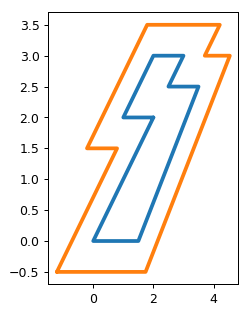

In [27]:
fig = pyplot.figure(1, dpi=90)
ax = fig.add_subplot(122)
obj = LineString ([(2,2),(1,2),(2,3),(3,3),(2.5,2.5),(3.5,2.5),(1.5,0),(0,0),(2,2)])

plot_line(ax, obj)

offset = obj.parallel_offset(0.5, 'left', join_style=2, mitre_limit=10.0)
plot_line(ax,offset)

mapping(offset)

print(obj)
print(offset)

# Unit Test

LINESTRING (-75.36859053000001 40.05247971, -75.36867753 40.05246406, -75.36867482 40.05251681, -75.36860663 40.05252972, -75.36859053000001 40.05247971, -75.36867753 40.05246406)


[(-75.3688004602992, 40.05232448163363),
 (-75.36878561223702, 40.05261349834159),
 (-75.36852786646341, 40.052662295788984),
 (-75.36843998754064, 40.05238932529653),
 (-75.36861485761177, 40.05235787006914),
 (-75.3688004602992, 40.05232448163363)]

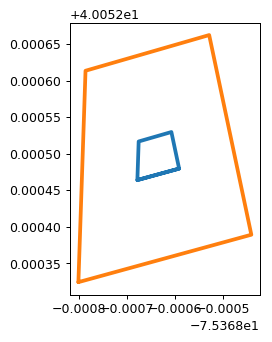

In [37]:
fig = pyplot.figure(1, dpi=90)
ax = fig.add_subplot(122)
coords = ([(-75.36859053,40.05247971),
           (-75.36867753,40.05246406),
           (-75.36867482,40.05251681),
           (-75.36860663,40.05252972),
           (-75.36859053,40.05247971),
           (-75.36867753,40.05246406)])
obj = LineString(coords)
plot_line(ax, obj)

offset = obj.parallel_offset(0.00011560788161, 'left', join_style=2, mitre_limit=10.0)
plot_line(ax,offset)

mapping(offset)

t = Polygon(offset)
print(obj)
list(t.exterior.coords)